In [2]:

import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split


In [3]:
digits = datasets.load_digits()
digits



{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [4]:
digits.images.shape


(1797, 8, 8)

In [5]:
digits.images.shape


(1797, 8, 8)

In [8]:
digits.images[0,:,:]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [9]:
#
#clases
#
set(digits.target)


{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

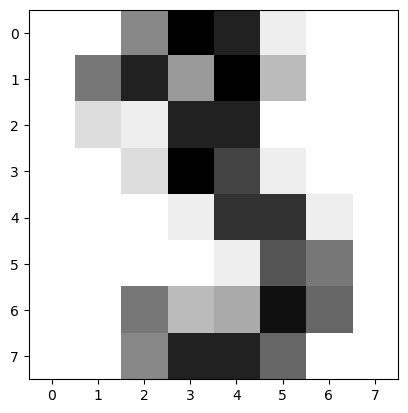

In [12]:
#
# Ejemplo de una imagen
#
plt.figure()
plt.imshow(digits.images[3], cmap=plt.cm.binary)
plt.grid(False)
plt.show()




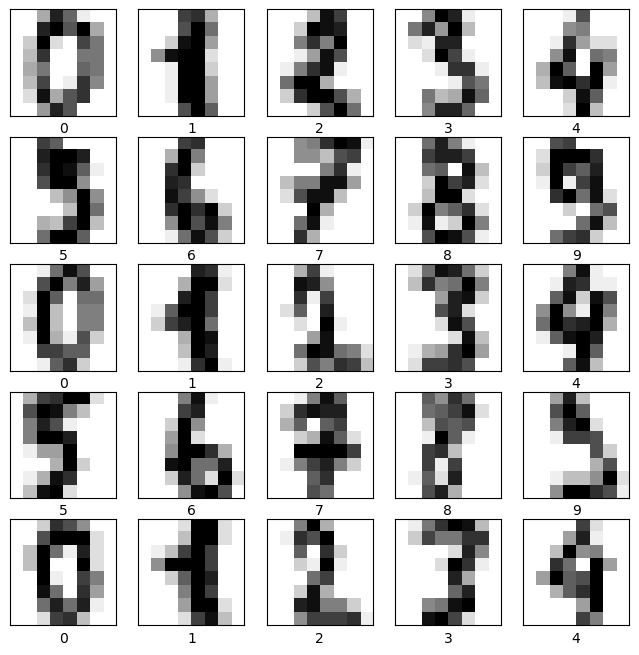

In [13]:
plt.figure(figsize=(8, 8))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(digits.images[i], cmap=plt.cm.binary)
    plt.xlabel(digits.target[i])
plt.show()


In [14]:
#
# Cambio de las dimensiones de los datos
#
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
data.shape



(1797, 64)

In [ ]:
#particionamiento de datos
x_train, x_test, y_train, y_test = train_test_split(
    data,
    digits.target,
    test_size=0.5,
    shuffle=False,
)

In [29]:

from sklearn.linear_model import LogisticRegression

estimator = LogisticRegression(max_iter=1000)
estimator




LogisticRegression(max_iter=1000)

In [30]:
estimator.fit(
    x_train,
    y_train,
)

LogisticRegression(max_iter=1000)

In [34]:
from sklearn.metrics import accuracy_score

#muestreo de entrenamiento

accuracy_score(
    y_true=y_train,
    y_pred=estimator.predict(x_train)
)

1.0

In [36]:
accuracy_score(y_true=y_train, y_pred=estimator.predict(x_train))



predictions = estimator.predict(x_test)
predicted_proba = estimator.predict_proba(x_test)

accuracy_score(y_true=y_test, y_pred=predictions)

accuracy_score(y_true=y_train, y_pred=estimator.predict(x_train))


1.0

Confusion matrix:
[[84  0  0  0  1  0  3  0  0  0]
 [ 0 82  0  1  0  1  0  0  2  5]
 [ 0  0 84  2  0  0  0  0  0  0]
 [ 0  0  0 76  0  4  0  2  7  2]
 [ 0  0  0  0 84  0  4  0  0  4]
 [ 0  2  0  0  0 85  1  0  0  3]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  1  1  0 85  0  2]
 [ 0  3  1  0  0  4  1  0 79  0]
 [ 1  0  0  2  0  2  0  0  1 86]]


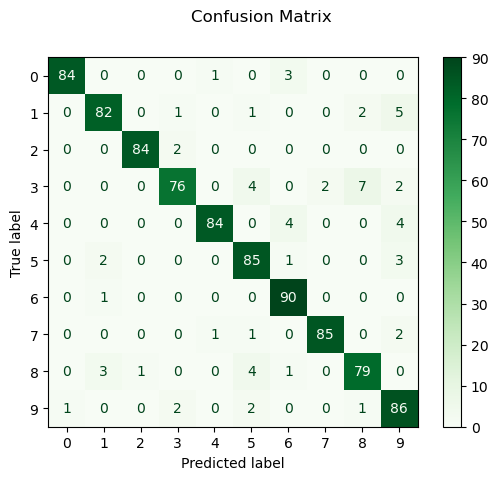

In [37]:

from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_predictions(
    y_test,
    predictions,
    cmap="Greens",
)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")



In [39]:
def plot_image(i, predicted_label, true_label, predicted_proba, img):

    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    #
    plt.imshow(img, cmap=plt.cm.binary)

    if predicted_label[i] == true_label:
        color = "blue"
    else:
        color = "red"

    plt.xlabel(
        "{} {:2.0f}% ({})".format(
            predicted_label[i],
            100 * max(predicted_proba[i, :]),
            true_label,
        ),
        color=color,
    )


def plot_value_array(i, predicted_proba, predicted_label, true_label):
    #
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predicted_proba[i, :], color="#777777")
    plt.ylim([0, 1])
    #
    thisplot[predicted_label[i]].set_color("red")
    thisplot[true_label[i]].set_color("blue")
    
    
    

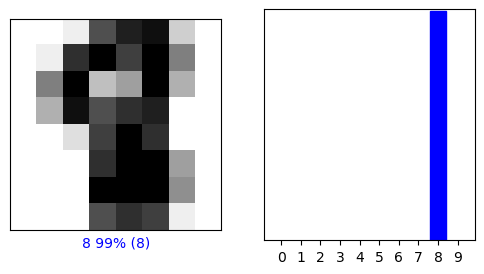

In [42]:
    
  
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(
    i,
    predictions,
    y_test,
    predicted_proba,
    x_test.reshape(len(x_test), 8, 8),
)
plt.subplot(1, 2, 2)
plot_value_array(
    i,
    predicted_proba,
    predictions,
    y_test,
)
plt.show()


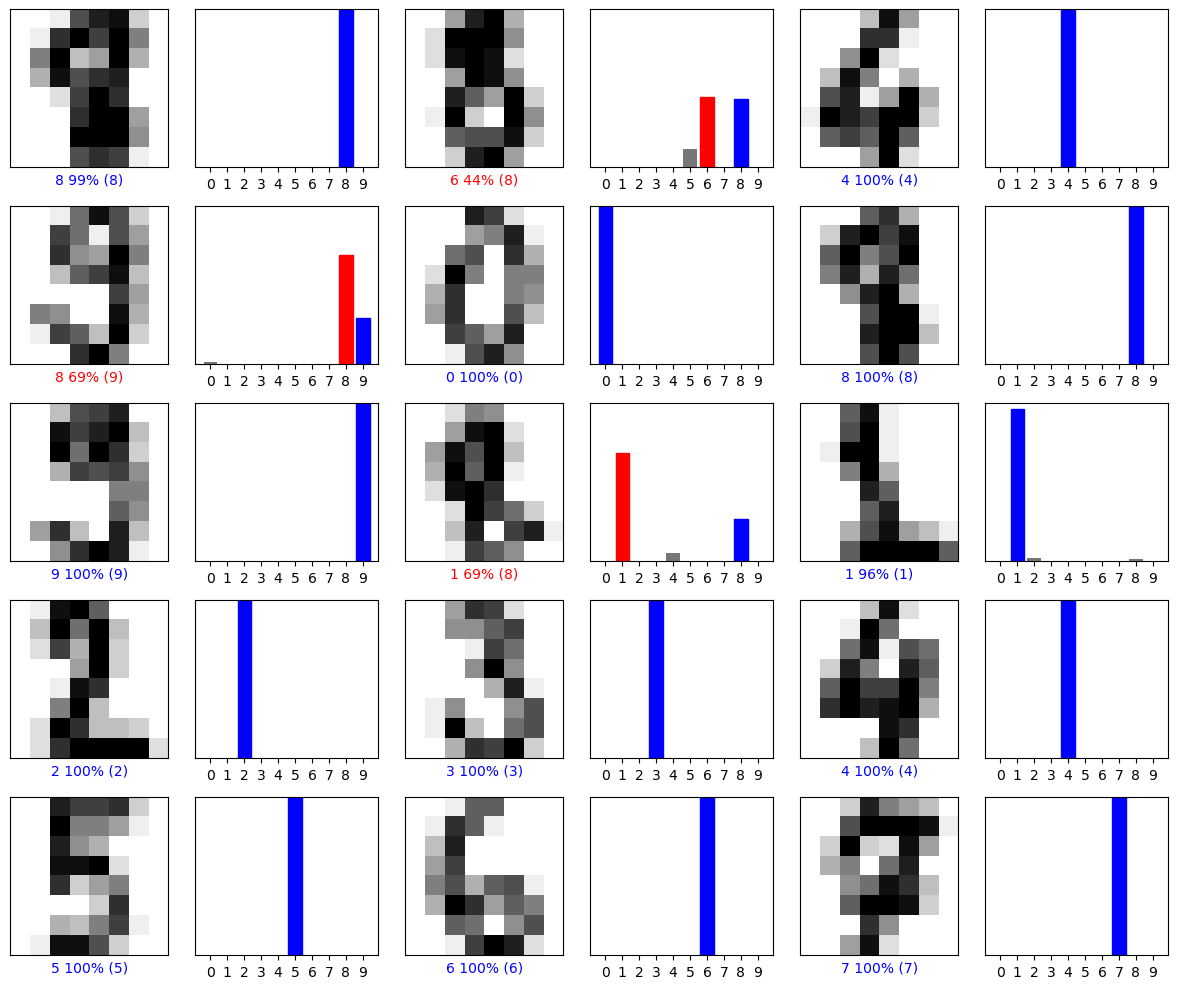

In [44]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols

plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(
        i,
        predictions,
        y_test,
        predicted_proba,
        x_test.reshape(len(x_test), 8, 8),
    )
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(
        i,
        predicted_proba,
        predictions,
        y_test,
    )
plt.tight_layout()
plt.show()

In [50]:

import pickle

with open("estimator.pkl", "wb") as file:
    pickle.dump(estimator, file)
    
    

In [51]:
with open("estimator.pkl", "rb") as file:
    new_clf = pickle.load(file)

accuracy_score(
    y_true=digits.target,
    y_pred=new_clf.predict(data),
)

0.9643850862548692